<a href="https://colab.research.google.com/github/Tommy840602/NLP/blob/main/Text_Analysis_with_NLTK_and_SpaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install spacytextblob
!python -m spacy download en_core_web_sm
!pip install autocorrect
import warnings
import numpy as np
import pandas as pd
import os
import re
import nltk
from nltk.corpus import abc
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import *
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
from autocorrect import Speller
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.models.word2vec import Text8Corpus
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
train_df = pd.read_csv('/content/train.csv')
print('Total number of entries in the train dataset are:', len(train_df))
train_df.head()

Total number of entries in the train dataset are: 7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
#Preliminary Analysis
train_df.shape

(7613, 5)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [7]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train_df.isna()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [9]:
train_df = train_df[['id', 'text']]
train_df

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...
7609,10870,@aria_ahrary @TheTawniest The out of control w...
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,Police investigating after an e-bike collided ...


In [10]:
text = train_df['text']
text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [14]:
#Sentence Tokenization
nltk.download('punkt')
sents1 = sent_tokenize(text[1000])
print(f'Sentence Tokenization using NLTK: \n {text[1000]} => {sents1}')

Sentence Tokenization using NLTK: 
 #OVOFest Drake straight body bagging Meek on that OVO stage. #ZIPHIMUP! => ['#OVOFest Drake straight body bagging Meek on that OVO stage.', '#ZIPHIMUP!']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
#Word Tokenization
words1 = word_tokenize(sents1[0])
print(f'Word Tokenization using NLTK: \n {sents1[0]} => {words1}')

Word Tokenization using NLTK: 
 #OVOFest Drake straight body bagging Meek on that OVO stage. => ['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.']


In [16]:
sp = spacy.load('en_core_web_sm')

In [17]:
print(f'Word Tokenization using SpaCy: \n\n{sp(text[0])} =>\n')
words2 = sp(text[0])
for word in words2:
    print(word)

Word Tokenization using SpaCy: 

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all =>

Our
Deeds
are
the
Reason
of
this
#
earthquake
May
ALLAH
Forgive
us
all


In [18]:
#Stopword Removal
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
tokens1 = [word for word in words1 if not word in stopwords.words('english')]
print(f'Stopword Removal using NLTK: \n{words1} => {tokens1}')

Stopword Removal using NLTK: 
['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.'] => ['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'OVO', 'stage', '.']


In [20]:
spacy_stopwords = sp.Defaults.stop_words
print(f'SpaCy Stopwords: \n{spacy_stopwords}')

SpaCy Stopwords: 
{'become', 'only', 'under', 'still', 'over', 'are', 'anyone', 'anyway', 'hereafter', 'herein', 'below', 'several', 'latter', '‘ve', 'thereafter', 'thereupon', 'those', 'which', "'ll", 'it', 'be', 'make', 'quite', 'us', 'towards', 'being', 'least', 'whereas', 'however', 'does', 'for', 'must', 'without', 'through', 'seem', 'yourself', '’s', 'go', 'them', 'once', 'herself', 'fifty', 'within', 'another', 'since', 'cannot', "'s", 'beforehand', 'then', 'last', 'perhaps', 'twenty', 'their', 'n‘t', 'everywhere', 'hundred', 'than', 'part', 'onto', 'whose', 'less', 'such', 'therefore', 'off', 'to', "'re", '‘re', 'ever', '‘m', 'about', 'whatever', 'during', 'him', 'own', 'whereby', 'more', 'amongst', 'here', 'there', 'nevertheless', 'formerly', 'whether', 'itself', 'because', 'some', 'thereby', 'neither', 'in', 'give', 'i', 'show', 'move', 'has', 'next', 'every', 'wherever', 'serious', 'beside', 'me', 'the', 'same', 'seems', 'alone', 'via', 'along', "'d", 'nor', 'further', 'most

In [21]:
tokens2 = [word for word in words2 if word not in spacy_stopwords]
print(f'Stopword Removal using SpaCy: \n{words2} => {tokens2}')

Stopword Removal using SpaCy: 
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all => [Our, Deeds, are, the, Reason, of, this, #, earthquake, May, ALLAH, Forgive, us, all]


In [22]:
#Delimiter Removal
from string import punctuation
print(f'Delimiters in English: \n{punctuation}')

Delimiters in English: 
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
tokens1 = [word for word in words1 if word not in punctuation]
print(f'Delimiter Removal: \n{words1} => {tokens1}')

Delimiter Removal: 
['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.'] => ['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage']


In [24]:
#Removal of Tags
sent_with_html = "<head> <title> Natural Language Processing </title> </head>"
remove_html = re.compile('<.*?>')

print(f"Removing HTML tags: \n{sent_with_html} => {re.sub(remove_html, '', sent_with_html).strip()}")

Removing HTML tags: 
<head> <title> Natural Language Processing </title> </head> => Natural Language Processing


In [25]:
#Spell Check
spell = Speller()
print('Spelling Correction:\n')
for token in tokens1:
    print(f'{token} => {spell(token)}')

Spelling Correction:

OVOFest => OVOFest
Drake => Drake
straight => straight
body => body
bagging => bagging
Meek => Meek
on => on
that => that
OVO => VO
stage => stage


In [26]:
#Stemming
porterStemmer = PorterStemmer()
stemWords1 = [porterStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Porter Stemmer: \n{stemWords1}')

Tokens after Stemming using Porter Stemmer: 
['ovofest', 'drake', 'straight', 'bodi', 'bag', 'meek', 'on', 'that', 'ovo', 'stage']


In [27]:
snowballStemmer = SnowballStemmer('english')
stemWords2 = [snowballStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Snowball Stemmer: \n{stemWords2}')

Tokens after Stemming using Snowball Stemmer: 
['ovofest', 'drake', 'straight', 'bodi', 'bag', 'meek', 'on', 'that', 'ovo', 'stage']


In [29]:
#Lemmatization
nltk.download('wordnet')
wordNetLemmatizer = WordNetLemmatizer()
lemmaWords1 = [wordNetLemmatizer.lemmatize(word) for word in tokens1]
print(f'Tokens after Lemmatization using WordNet Lemmatizer: \n{tokens1} => {lemmaWords1}')

[nltk_data] Downloading package wordnet to /root/nltk_data...


Tokens after Lemmatization using WordNet Lemmatizer: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => ['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage']


In [30]:
lemmaWords2 = [word.lemma_ for word in tokens2]
print(f'Tokens after Lemmatization using SpaCy Lemmatization: \n{tokens2} => {lemmaWords2}')

Tokens after Lemmatization using SpaCy Lemmatization: 
[Our, Deeds, are, the, Reason, of, this, #, earthquake, May, ALLAH, Forgive, us, all] => ['our', 'deed', 'be', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'may', 'ALLAH', 'forgive', 'we', 'all']


In [31]:
#FEATURE ENGINEERING
#Encoding
animals = ['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog']
label_encoder = preprocessing.LabelEncoder()
data = pd.DataFrame({'Labels' : animals, 'Label Encoder Values' : label_encoder.fit_transform(animals)})
print("Label Encoder")
data.style.background_gradient(cmap = 'BrBG')

Label Encoder


,Labels,Label Encoder Values
0,dog,1
1,cat,0
2,mouse,3
3,dog,1
4,lion,2
5,lion,2
6,mouse,3
7,tiger,5
8,rat,4
9,dog,1


In [32]:
animals = np.array(['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog'])
ohe = preprocessing.OneHotEncoder()
result = ohe.fit_transform(animals.reshape(-1,1)).toarray()
data = pd.DataFrame(result.astype(int))
data['Labels'] = animals
print("One Hot Encoder")
data.style.background_gradient(cmap = 'Wistia')

One Hot Encoder


,0,1,2,3,4,5,Labels
0,0,1,0,0,0,0,dog
1,1,0,0,0,0,0,cat
2,0,0,0,1,0,0,mouse
3,0,1,0,0,0,0,dog
4,0,0,1,0,0,0,lion
5,0,0,1,0,0,0,lion
6,0,0,0,1,0,0,mouse
7,0,0,0,0,0,1,tiger
8,0,0,0,0,1,0,rat
9,0,1,0,0,0,0,dog


In [34]:
#POS Tagger
nltk.download('averaged_perceptron_tagger')
tagged_tokens1 = nltk.pos_tag(tokens1)
print(f'POS tagging using NLTK: \n{tokens1} => {tagged_tokens1}')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


POS tagging using NLTK: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => [('OVOFest', 'NNP'), ('Drake', 'NNP'), ('straight', 'VBD'), ('body', 'NN'), ('bagging', 'VBG'), ('Meek', 'NNP'), ('on', 'IN'), ('that', 'DT'), ('OVO', 'NNP'), ('stage', 'NN')]


In [35]:
tagged_tokens2 = [word.pos_ for word in tokens2]
print('POS tagging using SpaCy: \n')
for i in range(len(tagged_tokens2)):
    print(f'{tokens2[i]} : {tagged_tokens2[i]}')

POS tagging using SpaCy: 

Our : PRON
Deeds : NOUN
are : AUX
the : DET
Reason : PROPN
of : ADP
this : PRON
# : SYM
earthquake : NOUN
May : AUX
ALLAH : PROPN
Forgive : VERB
us : PRON
all : PRON


In [36]:
#N-Gram
n_grams1 = ngrams(tokens1, 2)
n_grams1 = [ ' '.join(grams) for grams in n_grams1]
print(f'N-Gram using NLTK (n = 2): \n{tokens1} => {n_grams1}')

N-Gram using NLTK (n = 2): 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => ['OVOFest Drake', 'Drake straight', 'straight body', 'body bagging', 'bagging Meek', 'Meek on', 'on that', 'that OVO', 'OVO stage']


In [37]:
n_gram_finder = nltk.collocations.TrigramCollocationFinder.from_words(tokens1)
print(f'Most Common N-Gram Finder using NLTK (n = 3): \n{tokens1} => {n_gram_finder.ngram_fd.most_common(2)}')

Most Common N-Gram Finder using NLTK (n = 3): 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => [(('OVOFest', 'Drake', 'straight'), 1), (('Drake', 'straight', 'body'), 1)]


In [39]:
#Bag of Words
word_count = {}
for word in tokens1:
    if word not in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1
print(f'Bag of Words: \n{tokens1} => {word_count}')

Bag of Words: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => {'OVOFest': 1, 'Drake': 1, 'straight': 1, 'body': 1, 'bagging': 1, 'Meek': 1, 'on': 1, 'that': 1, 'OVO': 1, 'stage': 1}


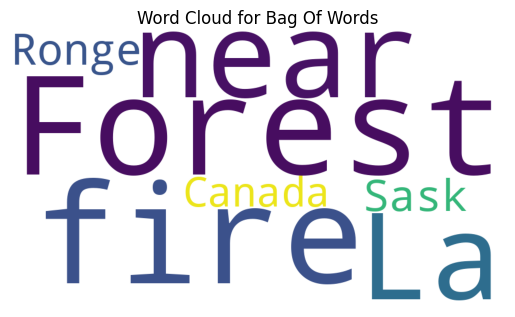

In [40]:
stopwords = set(STOPWORDS)
wc = WordCloud(width = 900, height = 500, background_color = 'white', random_state = 10).generate(text[1])
plt.title('Word Cloud for Bag Of Words')
plt.imshow(wc)
plt.axis('off')
plt.show()

In [41]:
#Term Frequency
def color(val):
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [43]:
count_vectorizer = CountVectorizer()
text_list = list(text[0:10])
tf = count_vectorizer.fit_transform(text_list)
tf_feature_names = count_vectorizer.get_feature_names_out()
print('Term Frequency of Document')
df = pd.DataFrame(tf.toarray(), columns = tf_feature_names) / len(tf_feature_names)
df.style.set_caption("Term Frequency of Document")
df.style.applymap(color)

Term Frequency of Document


,000,13,20,across,afraid,alaska,all,allah,an,and,are,area,areas,as,asked,being,both,building,by,cafire,california,can,canada,causes,closed,colorado,coming,county,deeds,directions,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,from,got,happening,heavy,hill,hwy,in,into,is,just,la,lake,manitou,may,near,no,notified,now,of,officers,on,or,orders,other,our,people,photo,place,pours,rain,reason,receive,residents,rockyfire,ronge,ruby,sask,school,see,sent,shelter,smoke,springs,street,streets,that,the,there,this,to,top,tornado,update,us,wildfires,woods
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.010204,0.010204,0.010204,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.010204,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [45]:
#Term Frequency -Inverse Document Frequency
tfidf_vectorizer = TfidfVectorizer()
text_list = list(text[0:10])
tfidf = tfidf_vectorizer.fit_transform(text_list)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print('Term Frequency - Inverse Document Frequency of Document')
df = pd.DataFrame(tfidf.toarray(), columns = tfidf_feature_names)
df.style.set_caption("Term Frequency - Inverse Document Frequency of Document")
df.style.applymap(color)


Term Frequency - Inverse Document Frequency of Document


,000,13,20,across,afraid,alaska,all,allah,an,and,are,area,areas,as,asked,being,both,building,by,cafire,california,can,canada,causes,closed,colorado,coming,county,deeds,directions,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,from,got,happening,heavy,hill,hwy,in,into,is,just,la,lake,manitou,may,near,no,notified,now,of,officers,on,or,orders,other,our,people,photo,place,pours,rain,reason,receive,residents,rockyfire,ronge,ruby,sask,school,see,sent,shelter,smoke,springs,street,streets,that,the,there,this,to,top,tornado,update,us,wildfires,woods
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257710,0.303156,0.000000,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.225466,0.000000,0.000000,0.000000,0.000000,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200455,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290530,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171413,0.000000,0.000000,0.000000,0.342825,0.000000,0.000000,0.000000,0.201640,0.201640,0.000000,0.000000,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149966,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201640,0.201640,0.000000,0.000000,0.201640,0.000000,0.201640,0.171413,0.201640,0.000000,0.000000,0.000000,0.403280,0.000000,0.000000,0.000000,0.000000,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.382366,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325046,0.000000,0.000000,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [46]:
#Dependency Parser
grammar = "NP: {<DT>?<JJ>*<NN>}"
parser = nltk.RegexpParser(grammar)
parse_tree = parser.parse(tagged_tokens1)
print(f'Dependency Parse Tree using NLTK: \n\n{sents1[0]} => \n\n{parse_tree}')

Dependency Parse Tree using NLTK: 

#OVOFest Drake straight body bagging Meek on that OVO stage. => 

(S
  OVOFest/NNP
  Drake/NNP
  straight/VBD
  (NP body/NN)
  bagging/VBG
  Meek/NNP
  on/IN
  that/DT
  OVO/NNP
  (NP stage/NN))


In [47]:
print('Dependency Parse Tree using SpaCy')
displacy.render(sp(text[1000]), style = "dep", jupyter = True, options = {"distance" : 100})

Dependency Parse Tree using SpaCy


In [50]:
#Named Entity Recognition
nltk.download('maxent_ne_chunker')
nltk.download('words')
ner_chunk = nltk.ne_chunk(tagged_tokens1)
print(f'Named Entity Recognition using NLTK: \n\n{sents1[0]} =>\n')
for x in str(ner_chunk).split('\n'):
    if '/NN' in x:
        print(x)

Named Entity Recognition using NLTK: 

#OVOFest Drake straight body bagging Meek on that OVO stage. =>

  (ORGANIZATION OVOFest/NNP)
  (PERSON Drake/NNP)
  body/NN
  (PERSON Meek/NNP)
  OVO/NNP
  stage/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [51]:
ner_sent = sp(text[1])
print(f'Named Entity Recognition using SpaCy: \n\n{ner_sent} =>\n')
for ent in ner_sent.ents:
    print(ent.text, '-', ent.label_)

Named Entity Recognition using SpaCy: 

Forest fire near La Ronge Sask. Canada =>

La Ronge Sask - FAC
Canada - GPE


In [59]:
print('Named Entity Recognition Visualization using SpaCy')
displacy.render(ner_sent, style = 'ent', jupyter = True)

Named Entity Recognition Visualization using SpaCy


In [65]:
#Word Embedding
from gensim.models import Word2Vec
nltk.download('abc')

word2vec = gensim.models.Word2Vec(abc.sents())
embedding1 = word2vec.wv.most_similar(tokens1[-1])
vector1 = word2vec.wv[tokens1[-1]]

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {vector1}')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!


Word Embeddibng using Word2Vec: 

Most Similar Words => [('point', 0.9082716107368469), ('morning', 0.8701195120811462), ('afternoon', 0.8512875437736511), ('situation', 0.8501734137535095), ('season', 0.8497864603996277), ('hand', 0.8422883152961731), ('case', 0.8408747315406799), ('particular', 0.8296428322792053), ('position', 0.828846275806427), ('view', 0.8233103156089783)] 

Word Vector => [-0.03989068  0.08268075  0.3166788   0.14506163  0.29966545 -0.52940404
  0.540701    0.16559915 -0.20819415 -0.81556016  0.0926348  -0.36657408
 -0.25531727  0.0873459   0.5186485  -0.02605297 -0.14497323 -0.89466035
  0.09077436 -0.72939914 -0.02410454  0.19128868  0.16080017  0.18214127
 -0.05465021  0.22107734 -0.49534827  0.43105686 -0.536889   -0.1135996
 -0.19540958  0.0868511   0.3342323   0.10611387 -0.05039387  0.64565516
  0.2382161  -0.162654   -0.18405467 -0.09332024 -0.40834776 -0.00400916
  0.06952397 -0.0619739   0.43562663 -0.39143428 -0.20192973  0.25791207
  0.7974501   0.81

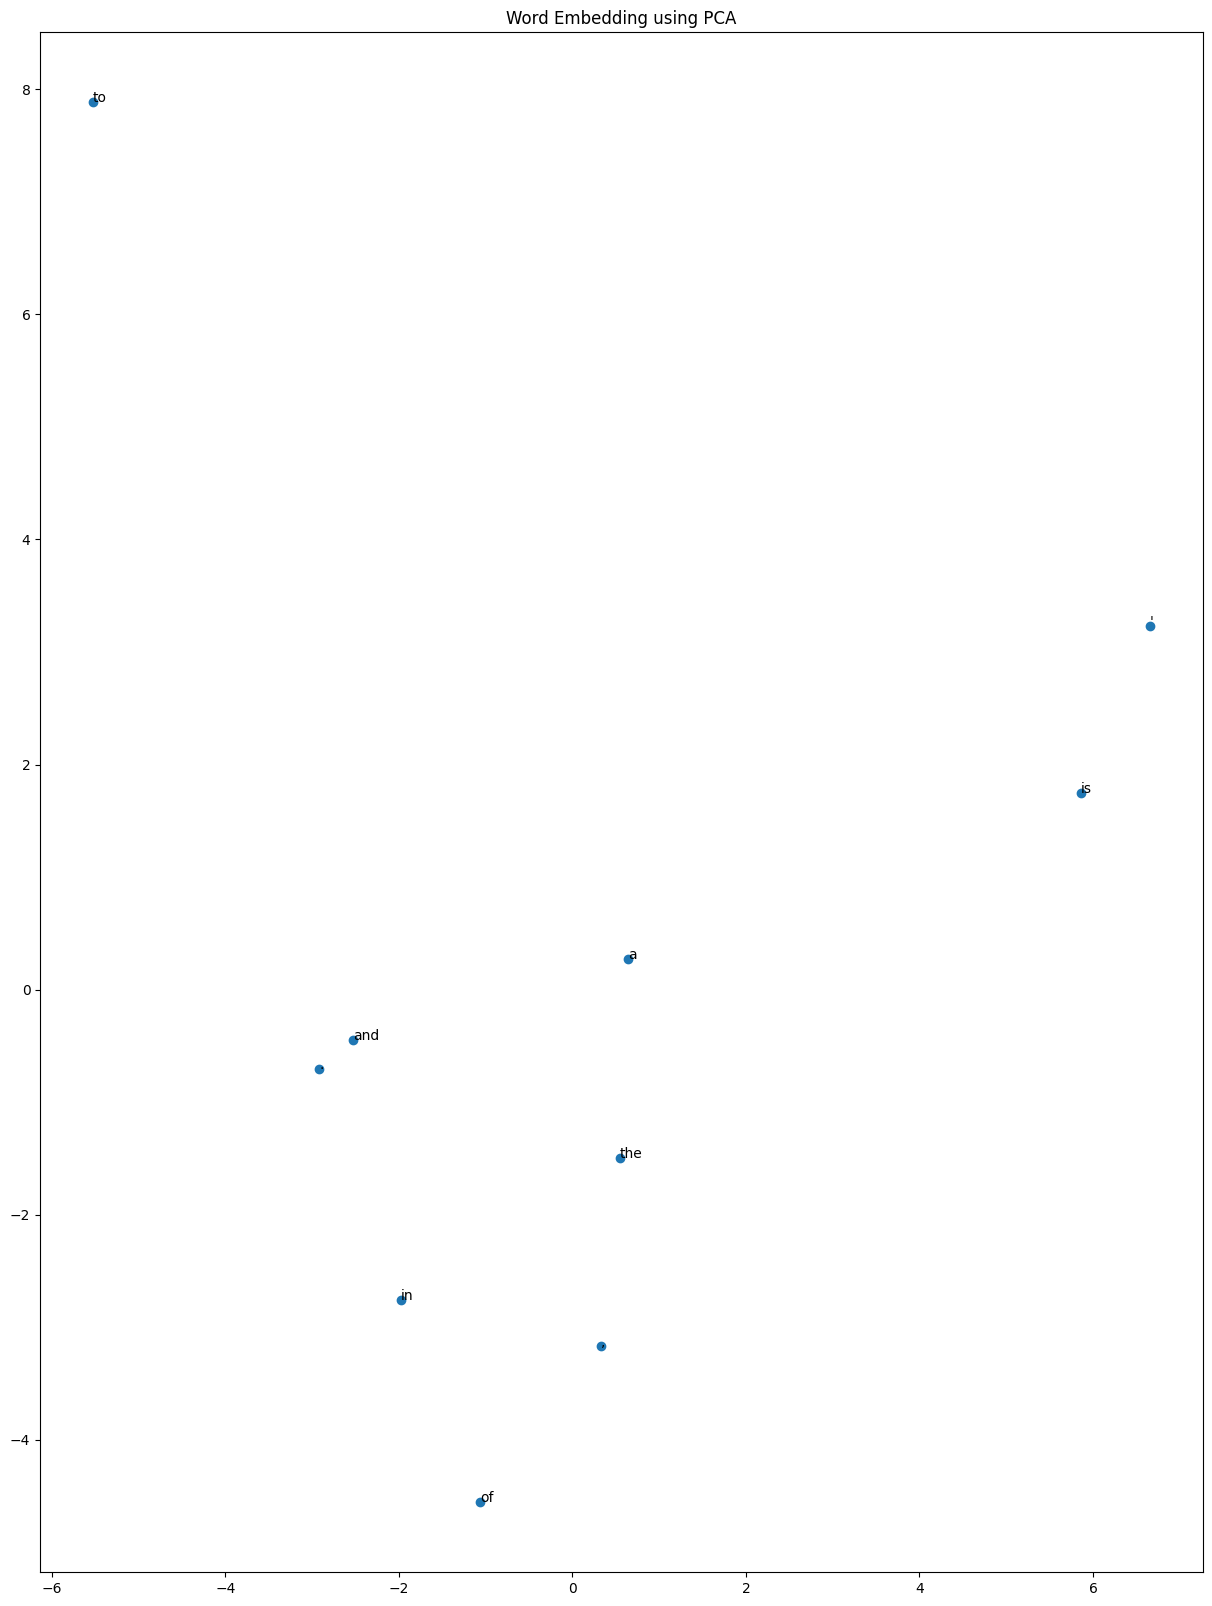

In [76]:
pca = PCA(n_components = 2)
X = word2vec.wv[word2vec.wv.index_to_key]
X = X[ : 10, : ]
result = pca.fit_transform(X)
words = list(word2vec.wv.index_to_key)
words = words[ : 10]
plt.figure(figsize = (15, 20))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

In [78]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-03-07 08:12:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-07 08:12:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-07 08:12:10--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [79]:
input_file = '/content/glove.6B.100d.txt'
output_file = '/content/glove.6B.100d.txt.word2vec'

glove2word2vec(input_file,output_file)

model = KeyedVectors.load_word2vec_format(output_file, binary = False)
result = model.most_similar(positive = ['king', 'woman'], negative = ['man'], topn = 1)

print(f'Word Embedding using GloVe: \n{result}')

Word Embedding using GloVe: 
[('queen', 0.7698540687561035)]


In [81]:
#Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
polarity_scores1 = sia.polarity_scores(text[10])

print(f"Sentiment Analysis using NLTK: \n{text[10]} => {polarity_scores1}")

Sentiment Analysis using NLTK: 
Three people died from the heat wave so far => {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


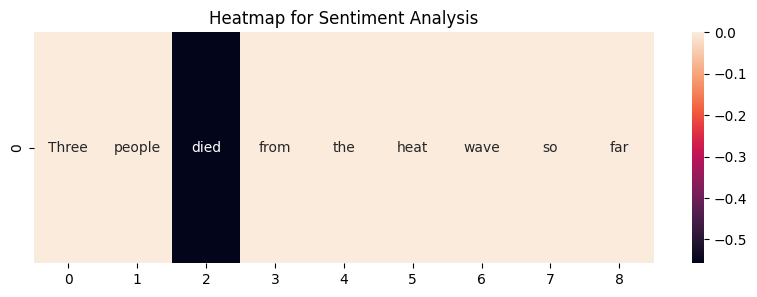

In [82]:
x = np.array([[sia.polarity_scores(word)['compound'] for word in word_tokenize(text[10])]])
annot = np.array([word_tokenize(text[10])])

plt.figure(figsize = (10, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Sentiment Analysis')
plt.show()

In [83]:
#Subjectivity Detection
sp.add_pipe('spacytextblob')
senti_sent = sp(text[20])

print(f"SpaCy using TextBlob: \n\n{text[20]} =>\n")
print(f"Sentiment Analysis: {senti_sent._.polarity}")
print(f"Sentiment Subjectivity: {senti_sent._.subjectivity}")
print(f"Sentiment Assessment: {senti_sent._.assessments}")

SpaCy using TextBlob: 

this is ridiculous.... =>

Sentiment Analysis: -0.3333333333333333
Sentiment Subjectivity: 1.0
Sentiment Assessment: [(['ridiculous'], -0.3333333333333333, 1.0, None)]


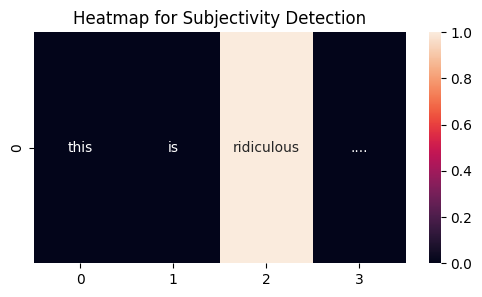

In [90]:
sub = sp(text[20])
x = np.array([[word._.subjectivity for word in sub]])
annot = np.array([word_tokenize(text[20])])
plt.figure(figsize = (6, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Subjectivity Detection')
plt.show()